In [2]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_variance computes the autcovariance f

Text(0,0.5,'magnitud')

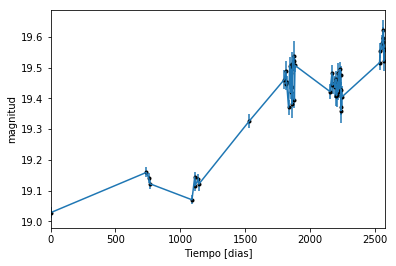

In [3]:
data = np.genfromtxt('LC_i_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=5, q=4)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

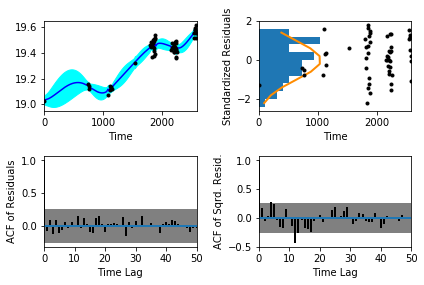

In [6]:
sample.assess_fit()

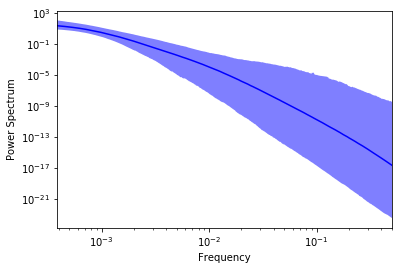

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.00048394,0.0487207,'Nivel de ruido')

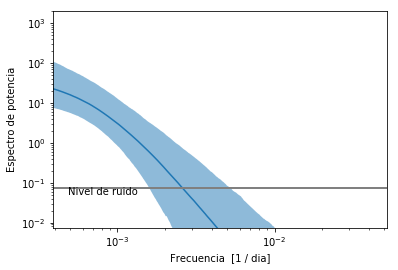

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [10]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [11]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [12]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 346.617470205
Median: 0.000420710547605
Standard deviation: 0.209375759716
68% credibility interval: [ 0.          0.17903257]
95% credibility interval: [ 0.          0.81815328]
99% credibility interval: [ 0.          0.97667399]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 346.617470205
Median: 0.000420710547605
Standard deviation: 0.209375759716
68% credibility interval: [ 0.          0.17903257]
95% credibility interval: [ 0.          0.81815328]
99% credibility interval: [ 0.          0.97667399]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1126.48522173
Median: 0.0
Standard deviation: 0.00875183632513
68%

Plotting parameter summary


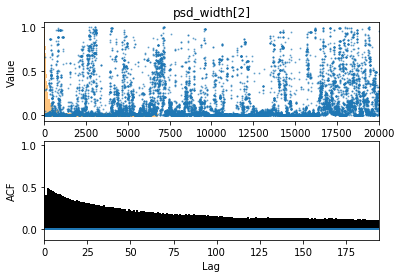

In [13]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [14]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1162.85400264
Median: 111.325758443
Standard deviation: 1.59161995386
68% credibility interval: [ 109.51619218  112.43652222]
95% credibility interval: [ 107.06597377  112.95748528]
99% credibility interval: [ 104.92993511  113.19377204]


In [16]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 6)

In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1389.21309082
Median: 1.19479208003
Standard deviation: 2.29566516777
68% credibility interval: [ 0.12892641  4.4710415 ]
95% credibility interval: [ 0.02540529  8.0694206 ]
99% credibility interval: [  0.0174206  10.6234142]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 518.685458256
Median: 0.349519036569
Standard deviation: 8.539367061
68% credibility interval: [ 0.01743048  6.3030326 ]
95% credibility interval: [  7.72485623e-04  

In [18]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5046.95540982
Median: 6.50101765855e-35
Standard deviation: 2.12943816782e+15
68% credibility interval: [  9.28370925e-60   8.89763257e-16]
95% credibility interval: [  3.73053485e-89   3.27072960e-03]
99% credibility interval: [  1.04271503e-99   7.12252176e+00]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 5046.95540982
Median: 4.39937353286e-23
Standard deviation: 5.47934278683e+40
68% credibility interval: [  7.87652347e-55   7.70

In [20]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1310.46172679
Median: 19.2856540588
Standard deviation: 0.140852315921
68% credibility interval: [ 19.17335171  19.40400962]
95% credibility interval: [ 19.02849651  19.58889725]
99% credibility interval: [ 18.86601297  19.82066921]


In [22]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 346.617470205
Median: 0.000420710547605
Standard deviation: 0.209375759716
68% credibility interval: [ 0.          0.17903257]
95% credibility interval: [ 0.          0.81815328]
99% credibility interval: [ 0.          0.97667399]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 346.617470205
Median: 0.000420710547605
Standard deviation: 0.209375759716
68% credibility interval: [ 0.          0.17903257]
95% credibility interval: [ 0.          0.81815328]
99% credibility interval: [ 0.          0.97667399]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1126.48522173
Median: 0.0
Standard deviation: 0.00875183632513
68%

In [24]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [25]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1162.85400264
Median: 111.325758443
Standard deviation: 1.59161995386
68% credibility interval: [ 109.51619218  112.43652222]
95% credibility interval: [ 107.06597377  112.95748528]
99% credibility interval: [ 104.92993511  113.19377204]


In [26]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 5)

In [27]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 398.052175878
Median: 0.0115018949259
Standard deviation: 0.196440349718
68% credibility interval: [ 0.00093827  0.20185261]
95% credibility interval: [  4.33598476e-04   7.66168314e-01]
99% credibility interval: [  3.96306777e-04   9.43553907e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 939.247137405
Median: 0.00109113581104
Standard deviation: 0.0869747670426
68% credibility interval: [ 0.00048332  0.01413529]
95% credibility interval: [ 0.00039967  0.25209929]
99% credibility interval: [  3.88985729e-04   6.89362906e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 515.453029131
Median: 0.0179607085212
Standard 

In [28]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1927.32247895
Median: 0.0447234243506
Standard deviation: 0.0675036315292
68% credibility interval: [ 0.02547594  0.09057104]
95% credibility interval: [ 0.01598106  0.21866599]
99% credibility interval: [ 0.01258111  0.37415242]


In [30]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [31]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 948.575121502
Median: 1.43907672975
Standard deviation: 0.205464320759
68% credibility interval: [ 1.24293759  1.66454196]
95% credibility interval: [ 1.07944565  1.87560342]
99% credibility interval: [ 0.98640882  1.96495419]


In [32]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [33]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 19527.0816455
Median: 1.17651285979e-06
Standard deviation: 0.0592916129641
68% credibility interval: [  1.95201433e-08   8.66809452e-05]
95% credibility interval: [  2.95950657e-10   3.35677095e-03]
99% credibility interval: [  4.21895787e-11   1.67081868e-02]


In [34]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 5)

In [35]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 398.052175878
Median: (-0.0722685372035-0.585523636471j)
Standard deviation: 1.80390917392
68% credibility interval: [-1.26827738+0.j         -0.00589535-0.00689038j]
95% credibility interval: [ -4.81397749e+00+0.j          -2.72437958e-03-0.69570271j]
99% credibility interval: [ -5.92852405e+00+0.j          -2.49006892e-03-0.21923612j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 939.247137405
Median: (-0.00685580849608+0.589560566584j)
Standard deviation: 1.42453569592
68% credibility interval: [-0.08881467+0.j -0.00303682+0.j]
95% credibility interval: [-1.58398657+5.04697345j -0.00251119+0.03207794j]
99% credibility interval: [ -4.33139488e+00 +6.19450570e+00j  -2.44406942e-03 +2.04934160e-05j]
Posterior summary

Plotting 2d PDF w KDE


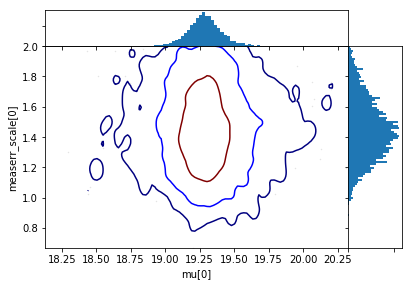

In [36]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


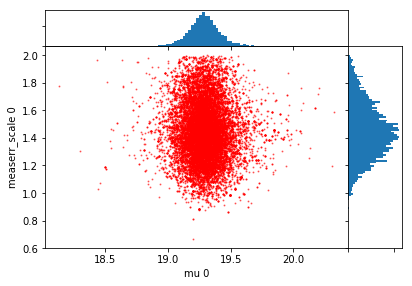

In [37]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


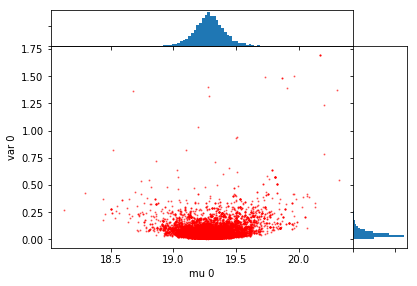

In [38]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


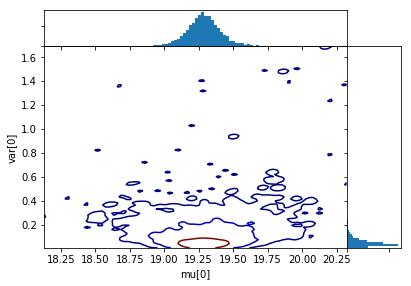

In [39]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

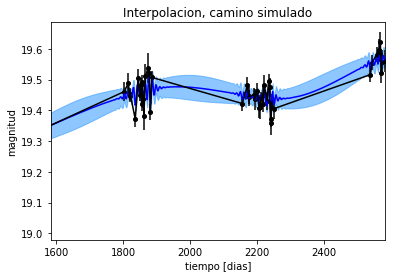

In [40]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

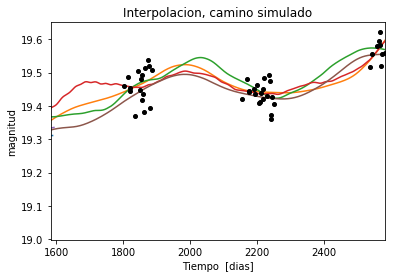

In [41]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')